In [1]:
include("../mobius_jl/mobius.jl")
using .mobius
using Plots

In [2]:
# Create a model application from model and data files
app = setup_model("../models/simplyc_model.txt", "../models/data/simplyc_langtjern.dat", true)

Main.mobius.Model_Data(Ptr{Nothing} @0x0000027352bf52b8, true)

In [3]:
# Get references to the start_date and end_date parameters and set their values
start_date = get_entity(app, "start_date")
end_date   = get_entity(app, "end_date")
start_date[] = "2005-01-01"
end_date[]   = "2008-12-31"

"2008-12-31"

In [4]:
# Run the model
run_model(app)

true

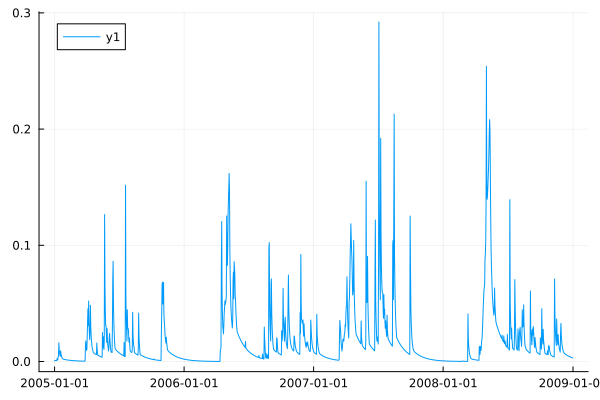

In [5]:
# Get a reference to a state variable in the model
flow = get_var_by_name(app, "Reach flow flux")

# Extract a result series of that variable at a specific index (in this case river section)
flow_results = flow["Inlet"]
dates = get_dates(flow)

# Plot the result series
plot(dates, flow_results)

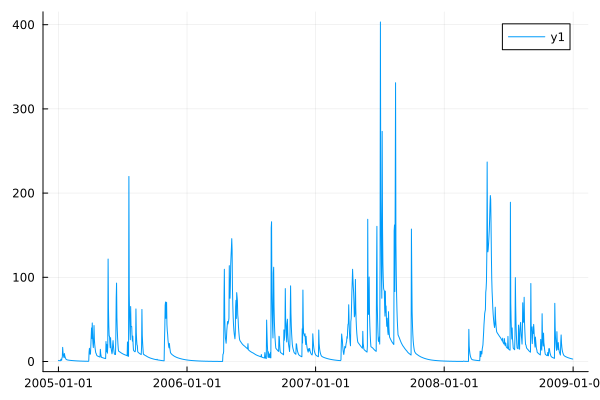

In [6]:
# Get the transport of organic carbon by this this river flow
doc_flux = transport(flow, "oc")

doc_flux_data = doc_flux["Inlet"]

plot(dates, doc_flux_data)